In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.ndimage import gaussian_filter1d, median_filter
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
import os

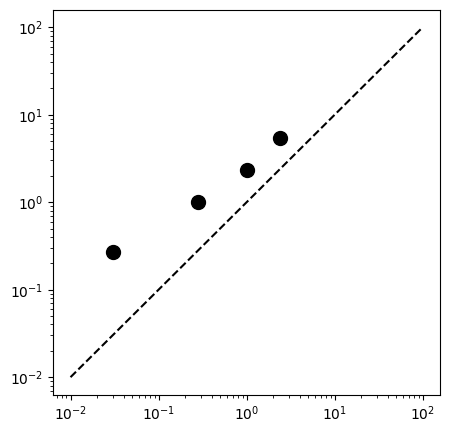

In [2]:
# load data
data = np.loadtxt('dKL_synth_colloid.dat')
H_list = [2,1,0.5,0.25]

# extract the corresponding terms
time_list = data[:, 0]
list_G_acc_gpr = data[:, 1]
list_G_acc_exp = data[:, 2]
list_G_m = data[:, 3]

f_interp_gpr = interp1d(list_G_acc_gpr[-1]-list_G_acc_gpr, np.log(time_list), kind='linear', fill_value='extrapolate')
f_interp_exp = interp1d(list_G_acc_exp[-1]-list_G_acc_exp, np.log(time_list), kind='linear', fill_value='extrapolate')

time_gpr = np.zeros_like(time_list)
time_exp = np.zeros_like(time_list)
for i in range(len(H_list)):
    H_i = H_list[i]
    time_gpr[i] = np.exp(f_interp_gpr(H_i))
    time_exp[i] = np.exp(f_interp_exp(H_i))

fig = plt.figure(figsize=(5, 5))
ax = plt.subplot(1, 1, 1)

ax.plot(time_gpr/time_exp[1], time_exp/time_exp[1], 'o', color='black', markersize=10)
ax.plot([1e-2, 1e2], [1e-2, 1e2], '--', color='black')
ax.set_xscale('log')
ax.set_yscale('log')

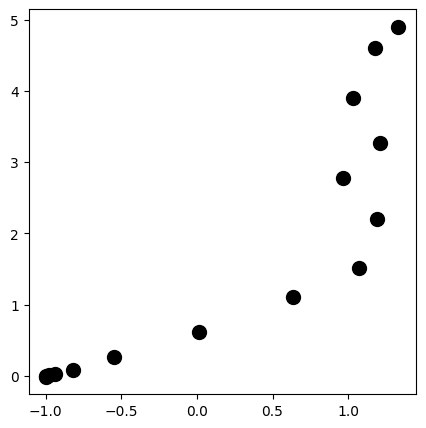

In [3]:
fig = plt.figure(figsize=(5, 5))
ax = plt.subplot(1, 1, 1)

ax.plot(list_G_m-list_G_acc_exp, list_G_acc_gpr[-1]-list_G_acc_gpr, 'o', color='black', markersize=10)
# ax.plot([-2, 2], [-2, 2], '--', color='black')
# ax.set_xscale('log')
# ax.set_yscale('log')

In [4]:
def extract_time_interp(data, H_list=[2, 1, 0.5, 0.25]):
    # extract the corresponding terms
    time_list = data[:, 0]
    list_G_acc_gpr = data[:, 1]
    list_G_acc_exp = data[:, 2]
    list_G_m = data[:, 3]

    # G_ref = (list_G_acc_exp[-1]+list_G_acc_gpr[-1])/2
    G_ref = np.max(np.array([list_G_acc_exp[-1],list_G_acc_gpr[-1]]), axis=0)
    f_interp_gpr = interp1d(list_G_acc_gpr[-1]-list_G_acc_gpr, np.log(time_list), kind='linear', fill_value='extrapolate')
    f_interp_exp = interp1d(list_G_acc_exp[-1]-list_G_acc_exp, np.log(time_list), kind='linear', fill_value='extrapolate')

    time_gpr = np.zeros_like(H_list)
    time_exp = np.zeros_like(H_list)
    for i in range(len(H_list)):
        H_i = H_list[i]
        time_gpr[i] = np.exp(f_interp_gpr(H_i))
        time_exp[i] = np.exp(f_interp_exp(H_i))
        time_gpr[i] = np.min([time_gpr[i], time_exp[i]])
        
    return time_gpr, time_exp

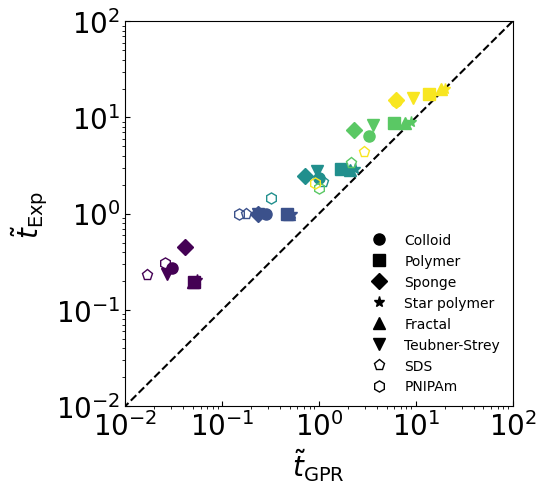

In [5]:
filename_list = ['dKL_synth_colloid.dat', 'dKL_synth_polymer.dat', 'dKL_synth_sponge.dat', 'dKL_synth_star.dat', 'dKL_synth_agg.dat', 'dKL_synth_ts.dat', 'dKL_exp_SDS.dat', 'dKL_exp_21217-8m8a-HS.dat']
labels_list = ['Colloid', 'Polymer', 'Sponge', 'Star polymer', 'Fractal', 'Teubner-Strey', 'SDS', 'PNIPAm']
markers_list = ['o', 's', 'D', "*", '^', 'v', 'p', "h", 'x']
colors_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
exp_list = [True, True, True, True, True, True, False, False]

H_list = [2, 1, 0.5, 0.2, 0.1]
colors_list_viridis = plt.cm.viridis(np.linspace(0, 0.99, len(H_list)))

fig = plt.figure(figsize=(5, 5))
ax = plt.subplot(1, 1, 1)
ax.plot([1e-3, 1e3], [1e-3, 1e3], '--', color='black')
# ax.plot([1e-3, 1e3], [3e-3, 3e3], '--', color='black')
# ax.plot([1e-3, 1e3], [1e-2, 1e4], '--', color='black')
# ax.fill_between([1e-3, 1e3], [1e-3, 1e3], [1e-2, 1e4], color='gray', alpha=0.1)

for i_f, filename in enumerate(filename_list):
    data = np.loadtxt(filename)
    time_gpr, time_exp = extract_time_interp(data, H_list=H_list)
    fillstyle = 'full' if exp_list[i_f] else 'none'
    
    for i_H, H in enumerate(H_list):
        label = None
        if i_H == 0:
            label = (filename.split('_')[2]).split('.')[0]
            label = labels_list[i_f]
            ax.plot([0,0], [0,0], marker=markers_list[i_f], color='k', label=label, markersize=8, fillstyle=fillstyle, linestyle='', markeredgewidth=1)
        ax.plot(time_gpr[i_H]/time_exp[1], time_exp[i_H]/time_exp[1], marker=markers_list[i_f], color=colors_list_viridis[i_H], label=None, markersize=8, fillstyle=fillstyle, linestyle='', markeredgewidth=1)
    

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e-2, 1e2])
ax.set_xlim([1e-2, 1e2])

ax.legend(frameon=False, loc='lower right', ncol=1)
ax.tick_params(direction='in', labelsize=20)
# ax.tick_params(axis='x', direction='in', labelsize=18)
ax.set_xlabel(r'$\tilde{t}_\mathrm{GPR}$', fontsize=20)
ax.set_ylabel(r'$\tilde{t}_\mathrm{Exp}$', fontsize=20)
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=9)
ax.xaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_locator(locmin)
locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax.xaxis.set_major_locator(locmaj)
ax.yaxis.set_major_locator(locmaj)

/tmp/ipykernel_3252594/7925621.py:32: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 20)
/tmp/ipykernel_3252594/7925621.py:33: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-0.5, 2.5)


Text(0, 0.5, '$t_\\mathrm{Exp}/t_\\mathrm{GPR}$')

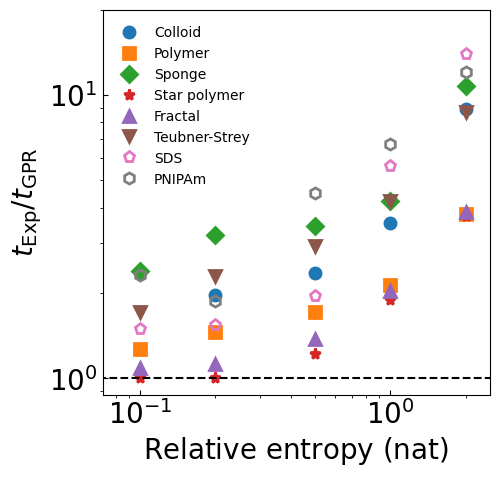

In [6]:
filename_list = ['dKL_synth_colloid.dat', 'dKL_synth_polymer.dat', 'dKL_synth_sponge.dat', 'dKL_synth_star.dat', 'dKL_synth_agg.dat', 'dKL_synth_ts.dat', 'dKL_exp_SDS.dat', 'dKL_exp_21217-8m8a-HS.dat']
labels_list = ['Colloid', 'Polymer', 'Sponge', 'Star polymer', 'Fractal', 'Teubner-Strey', 'SDS', 'PNIPAm']
markers_list = ['o', 's', 'D', "*", '^', 'v', 'p', "h", 'x']
colors_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
exp_list = [True, True, True, True, True, True, False, False]

H_list = [2, 1, 0.5, 0.2, 0.1]
colors_list_viridis = plt.cm.viridis(np.linspace(0, 0.99, len(H_list)))

fig = plt.figure(figsize=(5, 5))
ax = plt.subplot(1, 1, 1)

H_list = [2, 1, 0.5, 0.2, 0.1]
for i_f, filename in enumerate(filename_list):
    data = np.loadtxt(filename)
    time_gpr, time_exp = extract_time_interp(data, H_list=H_list)
    fillstyle = 'full' if exp_list[i_f] else 'none'
    
    for i_H, H in enumerate(H_list):
        label = None
        if i_H == 0:
            # label = (filename.split('_')[2]).split('.')[0]
            label = labels_list[i_f]
        ax.plot(H, time_exp[i_H]/time_gpr[i_H], marker=markers_list[i_f], color=colors_list[i_f], label=label, markersize=8, fillstyle=fillstyle, linestyle='', markeredgewidth=2)
    
ax.plot([-1, 1e2], [1, 1], '--', color='black')
ax.set_xscale('log')
ax.set_yscale('log')

ax.legend(frameon=False, loc='center left', bbox_to_anchor=(0, 0.75))
ax.tick_params(direction='in', labelsize=20)
ax.set_ylim(0, 20)
ax.set_xlim(-0.5, 2.5)
# ax.tick_params(axis='x', direction='in', labelsize=18)
ax.set_xlabel(r'$\mathrm{Relative\ entropy\ (nat)}$', fontsize=20)
ax.set_ylabel(r'$t_\mathrm{Exp}/t_\mathrm{GPR}$', fontsize=20)

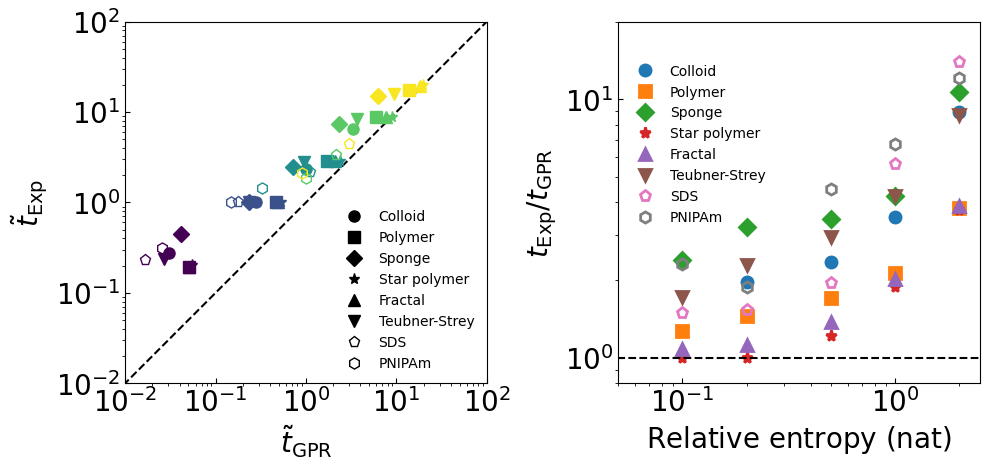

In [7]:
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 2, 1)
ax.plot([1e-3, 1e3], [1e-3, 1e3], '--', color='black')
# ax.plot([1e-3, 1e3], [3e-3, 3e3], '--', color='black')
# ax.plot([1e-3, 1e3], [1e-2, 1e4], '--', color='black')
# ax.fill_between([1e-3, 1e3], [1e-3, 1e3], [1e-2, 1e4], color='gray', alpha=0.1)

for i_f, filename in enumerate(filename_list):
    data = np.loadtxt(filename)
    time_gpr, time_exp = extract_time_interp(data, H_list=H_list)
    fillstyle = 'full' if exp_list[i_f] else 'none'
    
    for i_H, H in enumerate(H_list):
        label = None
        if i_H == 0:
            label = (filename.split('_')[2]).split('.')[0]
            label = labels_list[i_f]
            ax.plot([0,0], [0,0], marker=markers_list[i_f], color='k', label=label, markersize=8, fillstyle=fillstyle, linestyle='', markeredgewidth=1)
        ax.plot(time_gpr[i_H]/time_exp[1], time_exp[i_H]/time_exp[1], marker=markers_list[i_f], color=colors_list_viridis[i_H], label=None, markersize=8, fillstyle=fillstyle, linestyle='', markeredgewidth=1)
    

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e-2, 1e2])
ax.set_xlim([1e-2, 1e2])
ax.set_aspect('equal')

ax.legend(frameon=False, loc='lower right', ncol=1)
ax.tick_params(direction='in', labelsize=20)
# ax.tick_params(axis='x', direction='in', labelsize=18)
ax.set_xlabel(r'$\tilde{t}_\mathrm{GPR}$', fontsize=20)
ax.set_ylabel(r'$\tilde{t}_\mathrm{Exp}$', fontsize=20)
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=9)
ax.xaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_locator(locmin)
locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax.xaxis.set_major_locator(locmaj)
ax.yaxis.set_major_locator(locmaj)

ax = plt.subplot(1, 2, 2)
H_list = [2, 1, 0.5, 0.2, 0.1]
for i_f, filename in enumerate(filename_list):
    data = np.loadtxt(filename)
    time_gpr, time_exp = extract_time_interp(data, H_list=H_list)
    fillstyle = 'full' if exp_list[i_f] else 'none'
    
    for i_H, H in enumerate(H_list):
        label = None
        if i_H == 0:
            # label = (filename.split('_')[2]).split('.')[0]
            label = labels_list[i_f]
        ax.plot(H, time_exp[i_H]/time_gpr[i_H], marker=markers_list[i_f], color=colors_list[i_f], label=label, markersize=8, fillstyle=fillstyle, linestyle='', markeredgewidth=2)
    
ax.plot([-1, 1e2], [1, 1], '--', color='black')
ax.set_xscale('log')
ax.set_yscale('log')

ax.legend(frameon=False, loc='center left', bbox_to_anchor=(0, 0.66))
ax.tick_params(direction='in', labelsize=20)
ax.set_ylim(0.8, 20)
ax.set_xlim(0.05, 2.5)
# ax.tick_params(axis='x', direction='in', labelsize=18)
ax.set_xlabel(r'$\mathrm{Relative\ entropy\ (nat)}$', fontsize=20)
ax.set_ylabel(r'$t_\mathrm{Exp}/t_\mathrm{GPR}$', fontsize=20)
ax.set_aspect(np.log(0.05/2.5)/np.log(0.8/20))
plt.tight_layout()